# K Means Clustering Algorithm

### Elbow Method

![SSE](SSE.png)

#### Say we have k = 2 (two clusters), to calculate how related they are we calculate their SSEs (Sum of Squred Errors).

![SSE Vs k](SSE_Vs_K.png)

#### As you can see, the greater the k is, the smaller the error is. When each cluster only contains one data, the error becomes zero. How we choose an appropriate k value is by using the elbow method.

In [85]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [86]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


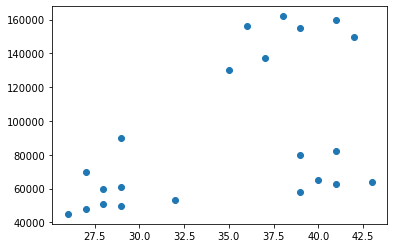

In [87]:
# visually the data
plt.scatter(df.Age, df['Income($)'])

In [88]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [89]:
# compute cluster centers and predict cluster index for each sample
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

Text(0, 0.5, 'Income ($)')

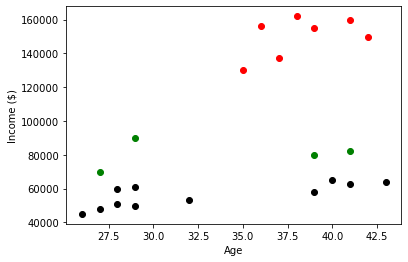

In [90]:
df['cluster'] = y_predicted
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='black')

plt.xlabel('Age')
plt.ylabel('Income ($)')

#### This is not properly clustered because the income's scale is much larger than the age's. To avoid this mistake, rescale them to the same level

### MinMaxScaler( )

In [91]:
# transform the columns with MinMaxScaler()
scaler = MinMaxScaler()
scaler.fit(df[['Age', 'Income($)']])
df[['Age', 'Income($)']] = scaler.transform(df[['Age', 'Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [92]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2],
      dtype=int32)

In [93]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


[[0.72268908 0.8974359 ]
 [0.1372549  0.11633428]
 [0.85294118 0.2022792 ]]


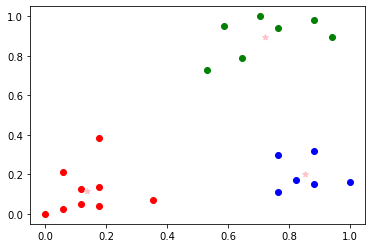

In [94]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color='green')
plt.scatter(df2.Age, df2['Income($)'], color='red')
plt.scatter(df3.Age, df3['Income($)'], color='blue')

# plot the centriod
print(km.cluster_centers_)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='pink', marker='*')

### How to get the k value

In [100]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [102]:
print(sse)

[5.434011511988179, 2.091136388699078, 0.4750783498553097, 0.3491047094419566, 0.2621792762345213, 0.22020960864009395, 0.1685851223602976, 0.1397684499538816, 0.10907864282306068]


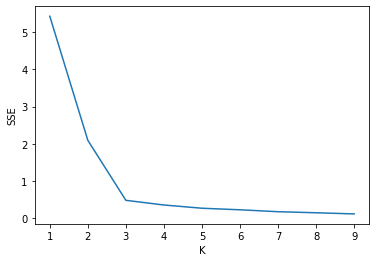

In [106]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng, sse)